In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=6d30a849ae6c41bbac4fe1609171a8effc3791b5e2fef0492febf16e4ff456ad
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [24]:
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/Market_Basket_Optimisation.csv', header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.iloc[1].dropna().tolist()


['burgers', 'meatballs', 'eggs']

In [ ]:
data.shape[0]

7501

In [ ]:
baskets = []
for  i in range(data.shape[0]):
  basket = data.iloc[i].dropna().tolist()
  baskets.append(basket)

In [ ]:
rules = apriori(baskets, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 3)
rules



<generator object apriori at 0x7efcd4629fe0>

In [ ]:
results = list(rules)
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [ ]:
df_results = pd.DataFrame(results)


In [ ]:
df_results.head()

,items,support,ordered_statistics
0,"(light cream, chicken)",0.004533,"[((light cream), (chicken), 0.2905982905982905..."
1,"(escalope, mushroom cream sauce)",0.005733,"[((mushroom cream sauce), (escalope), 0.300699..."
2,"(escalope, pasta)",0.005866,"[((pasta), (escalope), 0.3728813559322034, 4.7..."
3,"(fromage blanc, honey)",0.003333,"[((fromage blanc), (honey), 0.2450980392156863..."
4,"(ground beef, herb & pepper)",0.015998,"[((herb & pepper), (ground beef), 0.3234501347..."


In [ ]:
df_results['ordered_statistics'].iloc[0]


[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]

In [ ]:
df_results.sort_values(by='support',ascending=False)


,items,support,ordered_statistics
4,"(ground beef, herb & pepper)",0.015998,"[((herb & pepper), (ground beef), 0.3234501347..."
26,"(ground beef, spaghetti, frozen vegetables)",0.008666,"[((spaghetti, frozen vegetables), (ground beef..."
7,"(whole wheat pasta, olive oil)",0.007999,"[((whole wheat pasta), (olive oil), 0.27149321..."
30,"(mineral water, shrimp, frozen vegetables)",0.007199,"[((mineral water, shrimp), (frozen vegetables)..."
48,"(olive oil, milk, spaghetti)",0.007199,"[((milk, spaghetti), (olive oil), 0.2030075187..."
...,...,...,...
67,"(ground beef, milk, spaghetti, frozen vegetables)",0.003066,"[((ground beef, milk, frozen vegetables), (spa..."
75,"(mineral water, ground beef, olive oil, spaghe...",0.003066,"[((ground beef, olive oil), (mineral water, sp..."
73,"(mineral water, tomatoes, spaghetti, frozen ve...",0.003066,"[((mineral water, spaghetti, frozen vegetables..."
77,"(mineral water, ground beef, tomatoes, spaghetti)",0.003066,"[((ground beef, tomatoes), (mineral water, spa..."


In [15]:
double_item_pairs = df_results[
    df_results['items'].apply(lambda x: len(x)) ==2
]

In [16]:
double_item_pairs.head()

,items,support,ordered_statistics
0,"(light cream, chicken)",0.004533,"[((light cream), (chicken), 0.2905982905982905..."
1,"(escalope, mushroom cream sauce)",0.005733,"[((mushroom cream sauce), (escalope), 0.300699..."
2,"(escalope, pasta)",0.005866,"[((pasta), (escalope), 0.3728813559322034, 4.7..."
3,"(fromage blanc, honey)",0.003333,"[((fromage blanc), (honey), 0.2450980392156863..."
4,"(ground beef, herb & pepper)",0.015998,"[((herb & pepper), (ground beef), 0.3234501347..."


In [18]:
double_item_pairs.ordered_statistics.values[0]

[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]

In [21]:
antecents = []
consequents = []
lifts = []
for order_stat in double_item_pairs.ordered_statistics:
  stat = order_stat[0]
  antecents.append(stat.items_base)
  consequents.append(stat.items_add)
  lifts.append(stat.lift)
lift_df = pd.DataFrame({
    'antecents': antecents,
    'consequents': consequents,
    'lift': lifts
})
lift_df.head()

,antecents,consequents,lift
0,(light cream),(chicken),4.843951
1,(mushroom cream sauce),(escalope),3.790833
2,(pasta),(escalope),4.700812
3,(fromage blanc),(honey),5.164271
4,(herb & pepper),(ground beef),3.291994


In [22]:
lift_matrix = lift_df.pivot(index='antecents', columns='consequents', values='lift').fillna(0)
lift_matrix


consequents,(chicken),(escalope),(honey),(ground beef),(olive oil),(shrimp)
antecents,,,,,,
(light cream),4.843951,0.000000,0.000000,0.000000,3.11471,0.000000
(mushroom cream sauce),0.000000,3.790833,0.000000,0.000000,0.00000,0.000000
(pasta),0.000000,4.700812,0.000000,0.000000,0.00000,4.506672
(fromage blanc),0.000000,0.000000,5.164271,0.000000,0.00000,0.000000
(herb & pepper),0.000000,0.000000,0.000000,3.291994,0.00000,0.000000
(tomato sauce),0.000000,0.000000,0.000000,3.840659,0.00000,0.000000
(whole wheat pasta),0.000000,0.000000,0.000000,0.000000,4.12241,0.000000


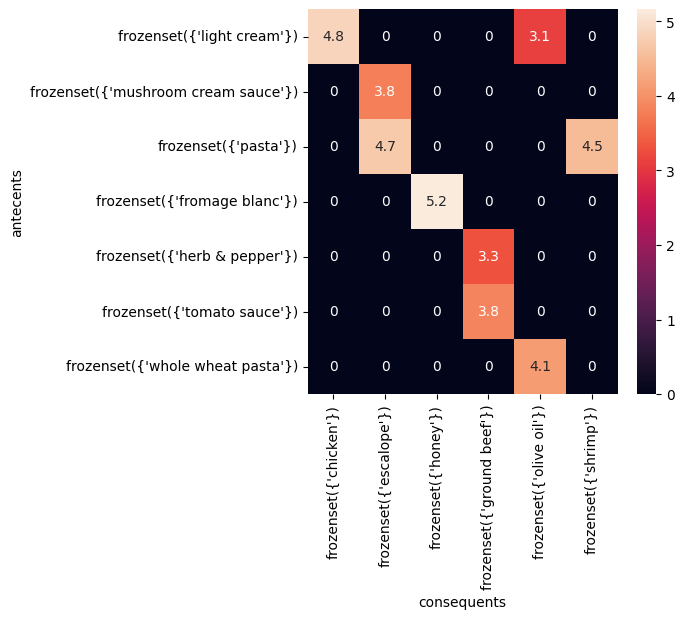

In [27]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(lift_matrix, annot=True)
plt.show()

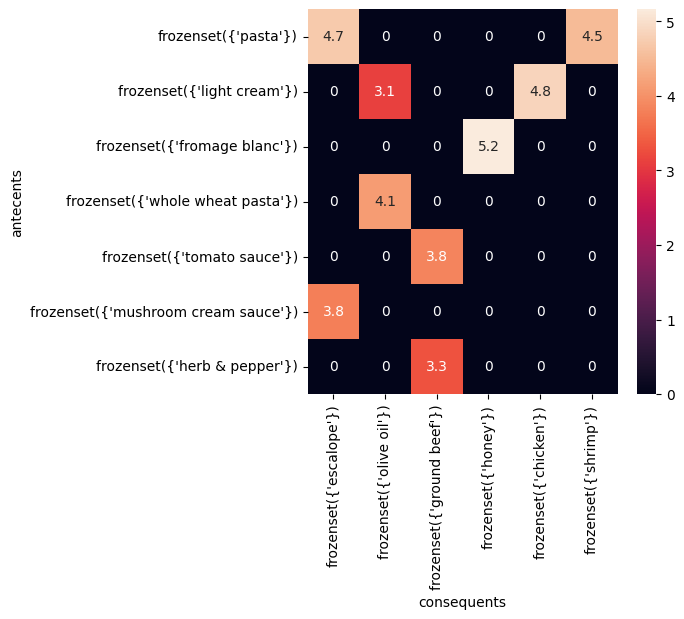

In [28]:
row_order = lift_matrix.mean(axis=1).sort_values(ascending=False).index
col_order = lift_matrix.mean(axis=0).sort_values(ascending=False).index

lift_matrix_clustered = lift_matrix.loc[row_order, col_order]
figure = plt.figure(figsize=(5,5))
sns.heatmap(lift_matrix_clustered, annot=True)
plt.show()